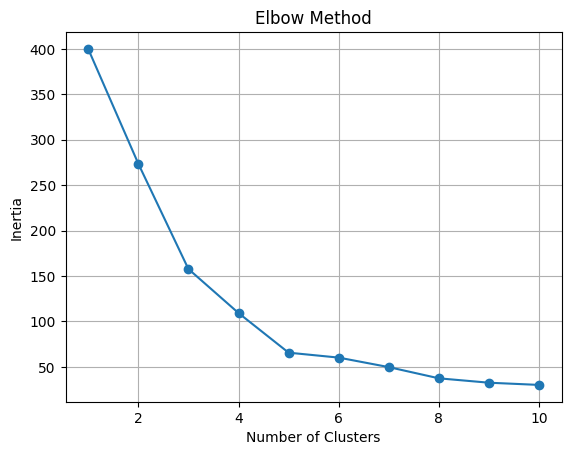

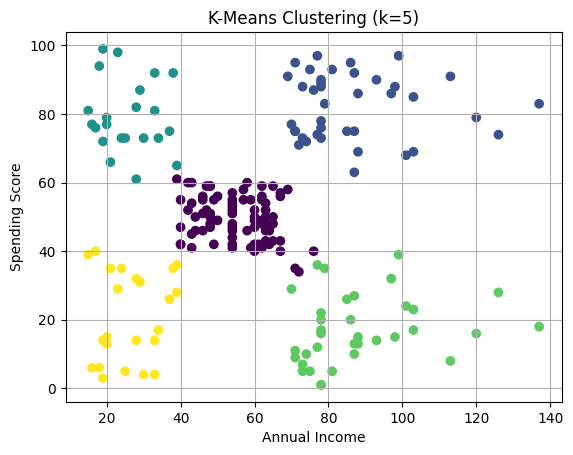

Silhouette Score: 0.5546571631111091


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# url = "https://raw.githubusercontent.com/sharmaroshan/Mall-Customer-Segmentation/master/Mall_Customers.csv"
df = pd.read_csv('/content/Mall_Customers.csv')

df = df[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
scaled = scaler.fit_transform(df)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid()
plt.show()

kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(scaled)

df['Cluster'] = labels

plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=labels, cmap='viridis')
plt.title("K-Means Clustering (k=5)")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.grid()
plt.show()

score = silhouette_score(scaled, labels)
print("Silhouette Score:", score)
